In [1]:
import matplotlib.pyplot as plt
from rlx import geo
import utm
import gmaps
import numpy as np
import randomcolor
from rlx.utils import read_password_protected_zip, STANDARD_COLORS
%matplotlib inline
API_key = read_password_protected_zip("google_apikey.zip")

input password for google_apikey.zip: ········


- https://overpass-api.de/
- https://mygeodata.cloud/converter/
- http://www.birdtheme.org/useful/v3tool.html
- https://github.com/kikocorreoso/brythonmagic/blob/master/notebooks/OpenLayers%20(python)%20tutorial.ipynb

#### plugin QGIS del catastro

- http://sec4qgis.tk/

In [2]:
reload(geo)
s = geo.read_shapefile("/Users/rlx/datasets/google_maps/alcala_henares.catastro_urbano_sin_historia_28_05_UA_2018-01-20_SHF/CONSTRU.SHP",
                      utm_zone_number=30, utm_zone_letter="T")

reading shapefile
converting to latlon


In [3]:
codes = s.CONSTRU.value_counts().index
colors = randomcolor.RandomColor().generate(count=len(codes))
code_colors = {codes[i]:colors[i] for i in range(len(codes))}
s["color"] = [code_colors[i] for i in s.CONSTRU.values]

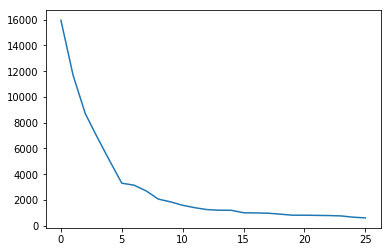

In [4]:
k = s.CONSTRU.value_counts()
k = k[k.values>600]
plt.plot(k.values)

### show some sample references

In [5]:
refcats = np.unique(s.REFCAT.values)
k = np.random.randint(len(refcats)-100)
p = refcats[k:k+10]
sp = s[[i in p for i in s.REFCAT]].copy()
print sp.CONSTRU.value_counts()
print len(sp)

P         18
-I+II     12
-I+III    10
I         10
-I+I       1
Name: CONSTRU, dtype: int64
51


In [6]:
def gmaps_multipolygon(latlon_coords, **kwargs):
    gp = geojson.MultiPolygon([[[list(j) for j in i[:,::-1]] for i in latlon_coords]])
    gf = geojson.Feature(geometry=gp)
    gc = geojson.FeatureCollection([gf])
    return gmaps.geojson_layer(gc, **kwargs)


In [7]:
import geojson

gmaps.configure(api_key=API_key)
fig = gmaps.figure()

for _, item in sp.iterrows():
    fig.add_layer(gmaps_multipolygon(item.latlon_coords, fill_color=item.color, fill_opacity=0.5))
fig

Figure()

### separte by type and save as kml

only codes with more than 600 entries are saved

In [8]:
from rlx import utils
import json
# saves dataframe from read_shapefile as geojson and kml
# adds kml and js file extensions automatically
def save_geo(sh_dataframe, fname):
    r = []
    for _,k in kp.iterrows():
        gp = geojson.MultiPolygon([[[list(j) for j in i[:,::-1]] for i in k.latlon_coords]])
        gf = geojson.Feature(geometry=gp)
        r.append(gf)
    gc = geojson.FeatureCollection(r)

    js_file  = fname+'.js'  #'/Users/rlx/tmp/alcala_%s.js'%constru
    kml_file = fname+'.kml' #'/Users/rlx/tmp/alcala_%s.kml'%constru
    with open(js_file, 'w+') as f:
        f.write(json.dumps(gc))
        
    _, stdout, _ = utils.command("tokml %s"%(js_file))
    stdout = "\n".join(stdout)
    with open(kml_file, "w") as f:
        f.write(stdout)

In [13]:
kp = s[["TZA" in i for i in s.CONSTRU.values]]
print len(kp)
save_geo(kp, '/Users/rlx/tmp/alcala_TZA')

10728


In [11]:
len(s)

96149

In [12]:
kp = s[["I" in i or "V" in i for i in s.CONSTRU.values]]
print len(kp)
save_geo(kp, '/Users/rlx/tmp/alcala_ALL_IV')

72538


In [12]:
for constru in np.unique(s.CONSTRU):
    if constru[0]==".":
        continue
    kp = s[s.CONSTRU==constru]
    if len(kp)<600:
        continue
    print "%s (%d),"%(constru, len(kp)),
    save_geo(kp, '/Users/rlx/tmp/alcala_%s'%constru)

-I (2703), -I+I (3300), -I+II (8706), -I+III (5046), -I+IV (800), -I+POR (787), -I+POR+I (1852), -I+V (758), -I+VI (897), B (814), I (11682), II (6835), III (3148), IV (1397), IVTZA (1249), P (15955), PI (1004), POR (2064), POR+I (990), SS+II (1196), SS+III (813), SUELO (970), TZA (1584), V (1199), VI (660), VITZA (603),


In [460]:
constru[0]

'.'

In [450]:
from rlx import utils

constru="PI"
#kp = s[[len(i)>1 for i in s.latlon_coords]]
kp = s[s.CONSTRU==constru]

from rlx import utils
# saves dataframe from read_shapefile as geojson and kml
# adds kml and js file extensions automatically
def save_geo(sh_dataframe, fname):
    r = []
    for _,k in kp.iterrows():
        gp = geojson.MultiPolygon([[[list(j) for j in i[:,::-1]] for i in k.latlon_coords]])
        gf = geojson.Feature(geometry=gp)
        r.append(gf)
    gc = geojson.FeatureCollection(r)

    js_file  = fname+'.js'  #'/Users/rlx/tmp/alcala_%s.js'%constru
    kml_file = fname+'.kml' #'/Users/rlx/tmp/alcala_%s.kml'%constru
    with open(js_file, 'w+') as f:
        f.write(json.dumps(gc))

    !tokml $js_file > $kml_file

In [451]:
js_file = '/Users/rlx/tmp/alcala_%s.js'%constru
kml_file = '/Users/rlx/tmp/alcala_%s.kml'%constru
with open(js_file, 'w+') as f:
    f.write(json.dumps(gc))
    
!tokml $js_file > $kml_file

In [449]:
!tokml $js_file > $kml_file

In [452]:
np.unique(s.CONSTRU)

array(['-I', '-I+-I', '-I+B', '-I+CO', '-I+DEP', '-I+EPT+II',
       '-I+EPT+XIV', '-I+EPT+XVI', '-I+I', '-I+I+B', '-I+I+EPT',
       '-I+I+EPT+I', '-I+I+EPT+II', '-I+I+EPT+III', '-I+I+EPT+IV',
       '-I+I+EPT+TZA+I', '-I+I+I', '-I+I+IIITZA', '-I+I+IIITZA+I',
       '-I+I+IITZA', '-I+I+ITZA', '-I+I+IV', '-I+I+IVTZA', '-I+I+IVTZA+I',
       '-I+I+POR', '-I+I+TZA', '-I+I+TZA+I', '-I+I+TZA+I+TZA+I',
       '-I+I+TZA+II', '-I+I+VII', '-I+I+VIIITZA', '-I+I+VIITZA',
       '-I+I+VIITZA+I', '-I+I+VITZA', '-I+I+VIVOL', '-I+I+VPOR',
       '-I+I+VTZA', '-I+I+XTZA', '-I+II', '-I+II+ALT', '-I+II+I',
       '-I+II+IIITZA', '-I+II+IITZA', '-I+II+ITZA', '-I+II+IVTZA',
       '-I+II+POR', '-I+II+TZA', '-I+II+TZA+I+TZA', '-I+II+VIIITZA',
       '-I+II+VITZA', '-I+III', '-I+III+ALT', '-I+III+IITZA',
       '-I+III+ITZA', '-I+III+TZA', '-I+III+TZA+I', '-I+IIISOP+IV',
       '-I+IIITZA', '-I+IIITZA+I', '-I+IIIVOL', '-I+IIPOR', '-I+IISOP+IV',
       '-I+IITZA', '-I+IIVOL', '-I+IPOR+I', '-I+ITZA', '-I+ITZ

In [453]:
from rlx import utils

In [454]:
utils.command?

In [57]:
gmaps.__version__

'0.7.0'

In [13]:
a = np.r_[True, False, False, True]
a

array([ True, False, False,  True])

In [14]:
sum(a)

2